# Import necessary libraries


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
import gc
import re as re
from collections import Counter

import math
import warnings
warnings.filterwarnings("ignore")

# Read the data from CSV files


In [17]:
df = pd.read_csv("./Data Science Labs/diabetes.csv")

In [18]:
df.head()

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,5,-1.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


# Data preprocessing


## Exploring the data


In [19]:
df.dtypes

Patient_ID                    int64
Pregncies                   float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

In [20]:
df.describe()

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,770.000000,768.000000,768.000000,766.000000,766.000000,767.000000,768.000000,767.000000,766.000000,770.000000
mean,385.500000,3.821615,120.523438,67.638381,20.518277,80.954368,31.989714,0.471630,33.263708,0.349351
std,222.424144,3.391177,33.223701,43.209852,15.959067,118.502148,7.883820,0.331397,11.809530,0.477075
min,1.000000,-6.000000,-129.000000,-1000.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,193.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,385.500000,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.371000,29.000000,0.000000
75%,577.750000,6.000000,140.250000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,770.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                770 non-null    int64  
 1   Pregncies                 768 non-null    float64
 2   Glucose                   768 non-null    float64
 3   BloodPressure             766 non-null    float64
 4   SkinThickness             766 non-null    float64
 5   Insulin                   767 non-null    float64
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  767 non-null    float64
 8   Age                       766 non-null    float64
 9   Outcome                   770 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 60.3 KB


## Handling duplicate values


In [22]:
# check for duplicated rows
df.duplicated().sum()

0

In [23]:
# check for duplicated primary key
df["Patient_ID"].duplicated().sum()

0

## Handling missing values


<Axes: >

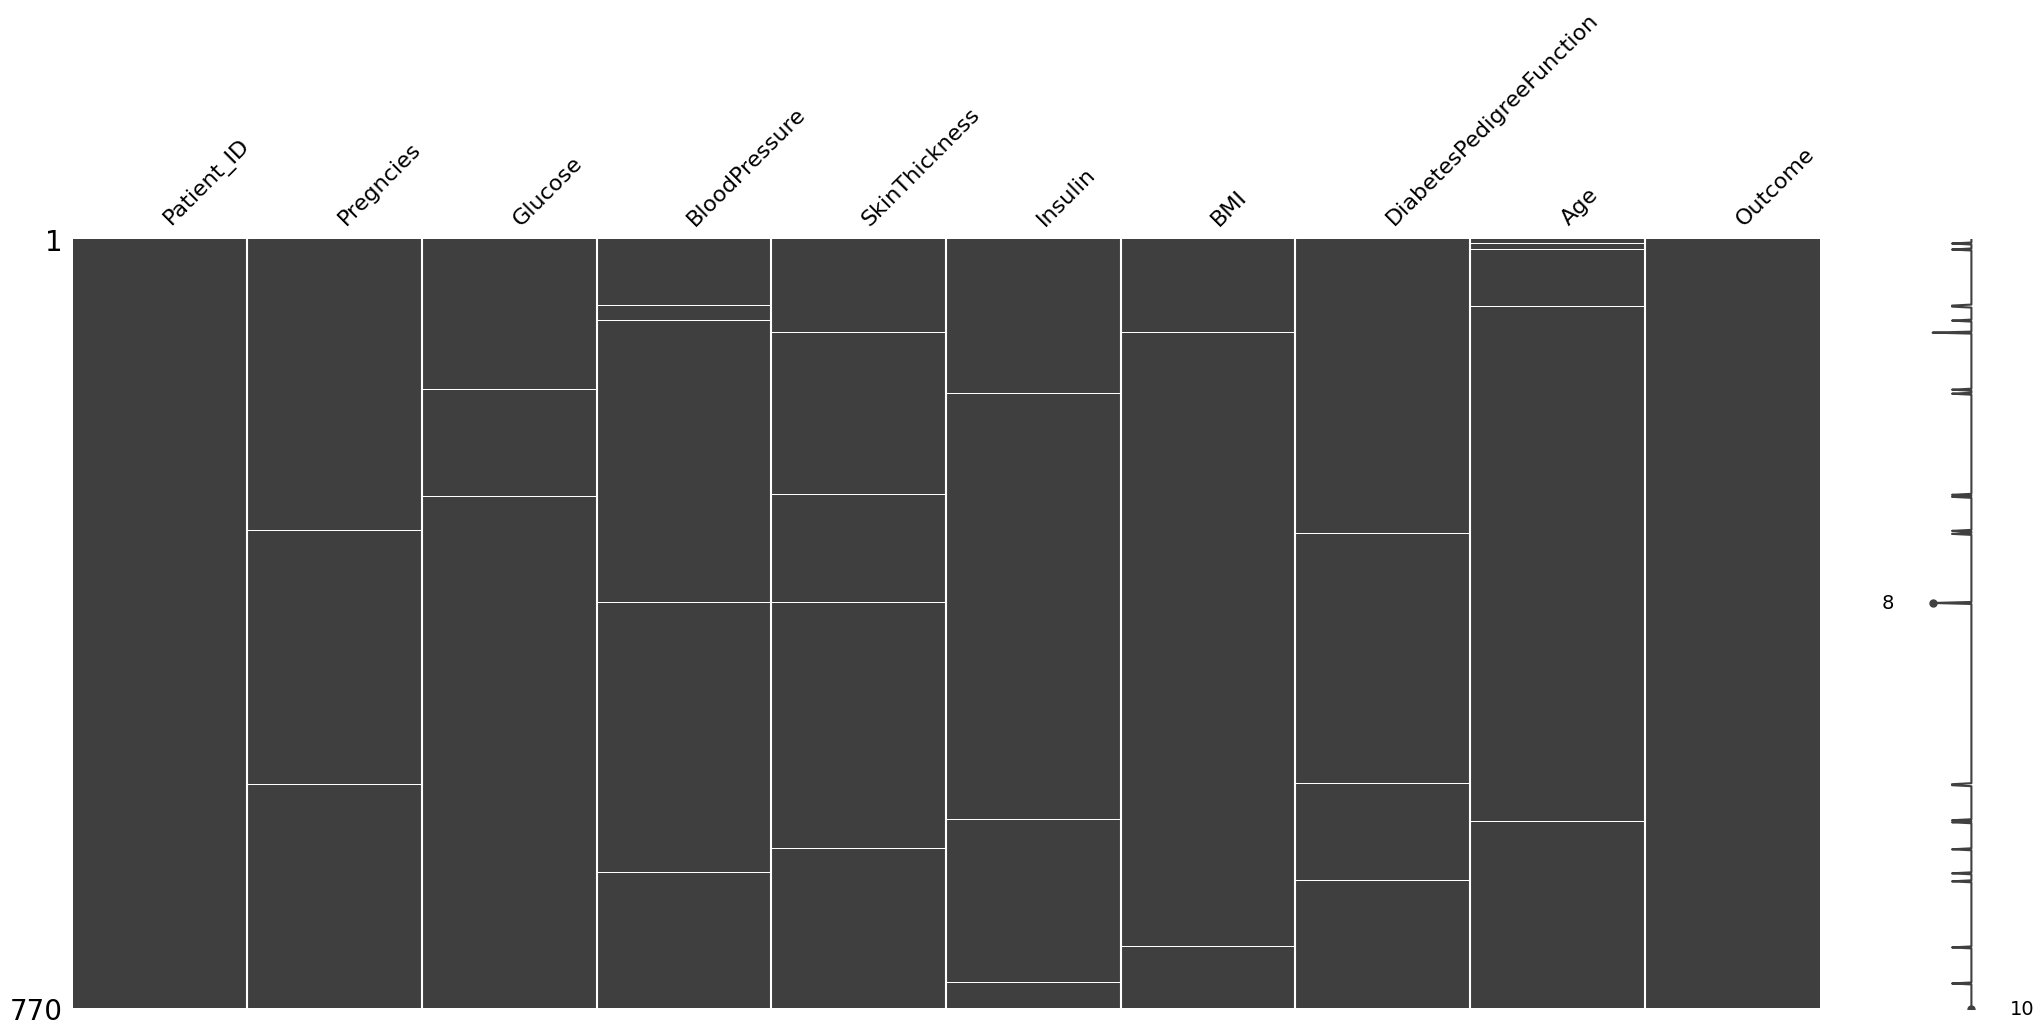

In [24]:
import missingno as msno

msno.matrix(df)

In [25]:
df.isna().sum()

Patient_ID                  0
Pregncies                   2
Glucose                     2
BloodPressure               4
SkinThickness               4
Insulin                     3
BMI                         2
DiabetesPedigreeFunction    3
Age                         4
Outcome                     0
dtype: int64

**Bar plot**

Visualize the missing values with bar plot.


<Axes: >

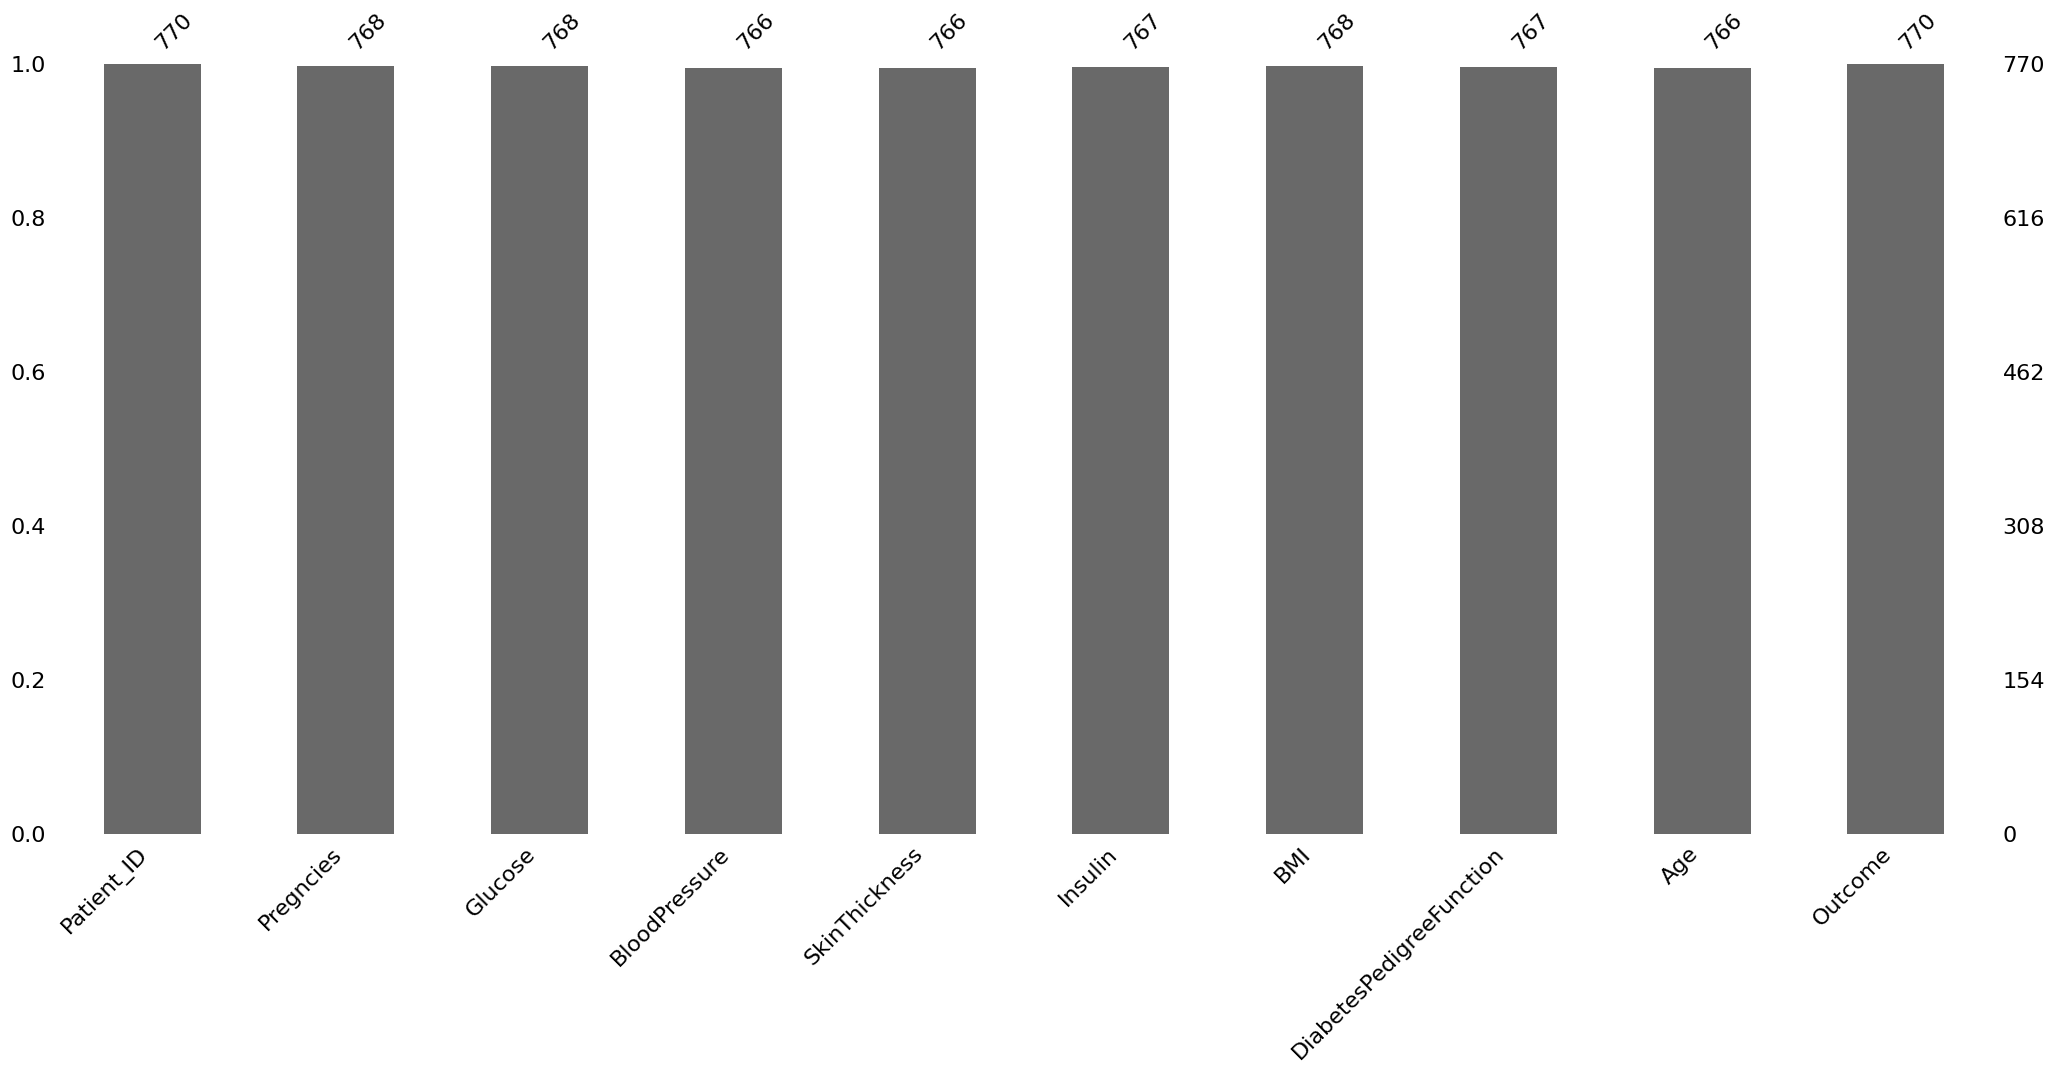

In [26]:
msno.bar(df)

**Heatmap**

-   The heatmap is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.

-   Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.

-   Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.

-   Values close to 0, indicate there is little to no relationship between the presence of null values in one column compared to another.

-   There are a number of values that show as <-1. This indicates that the correlation is very close to being 100% negative.


<Axes: >

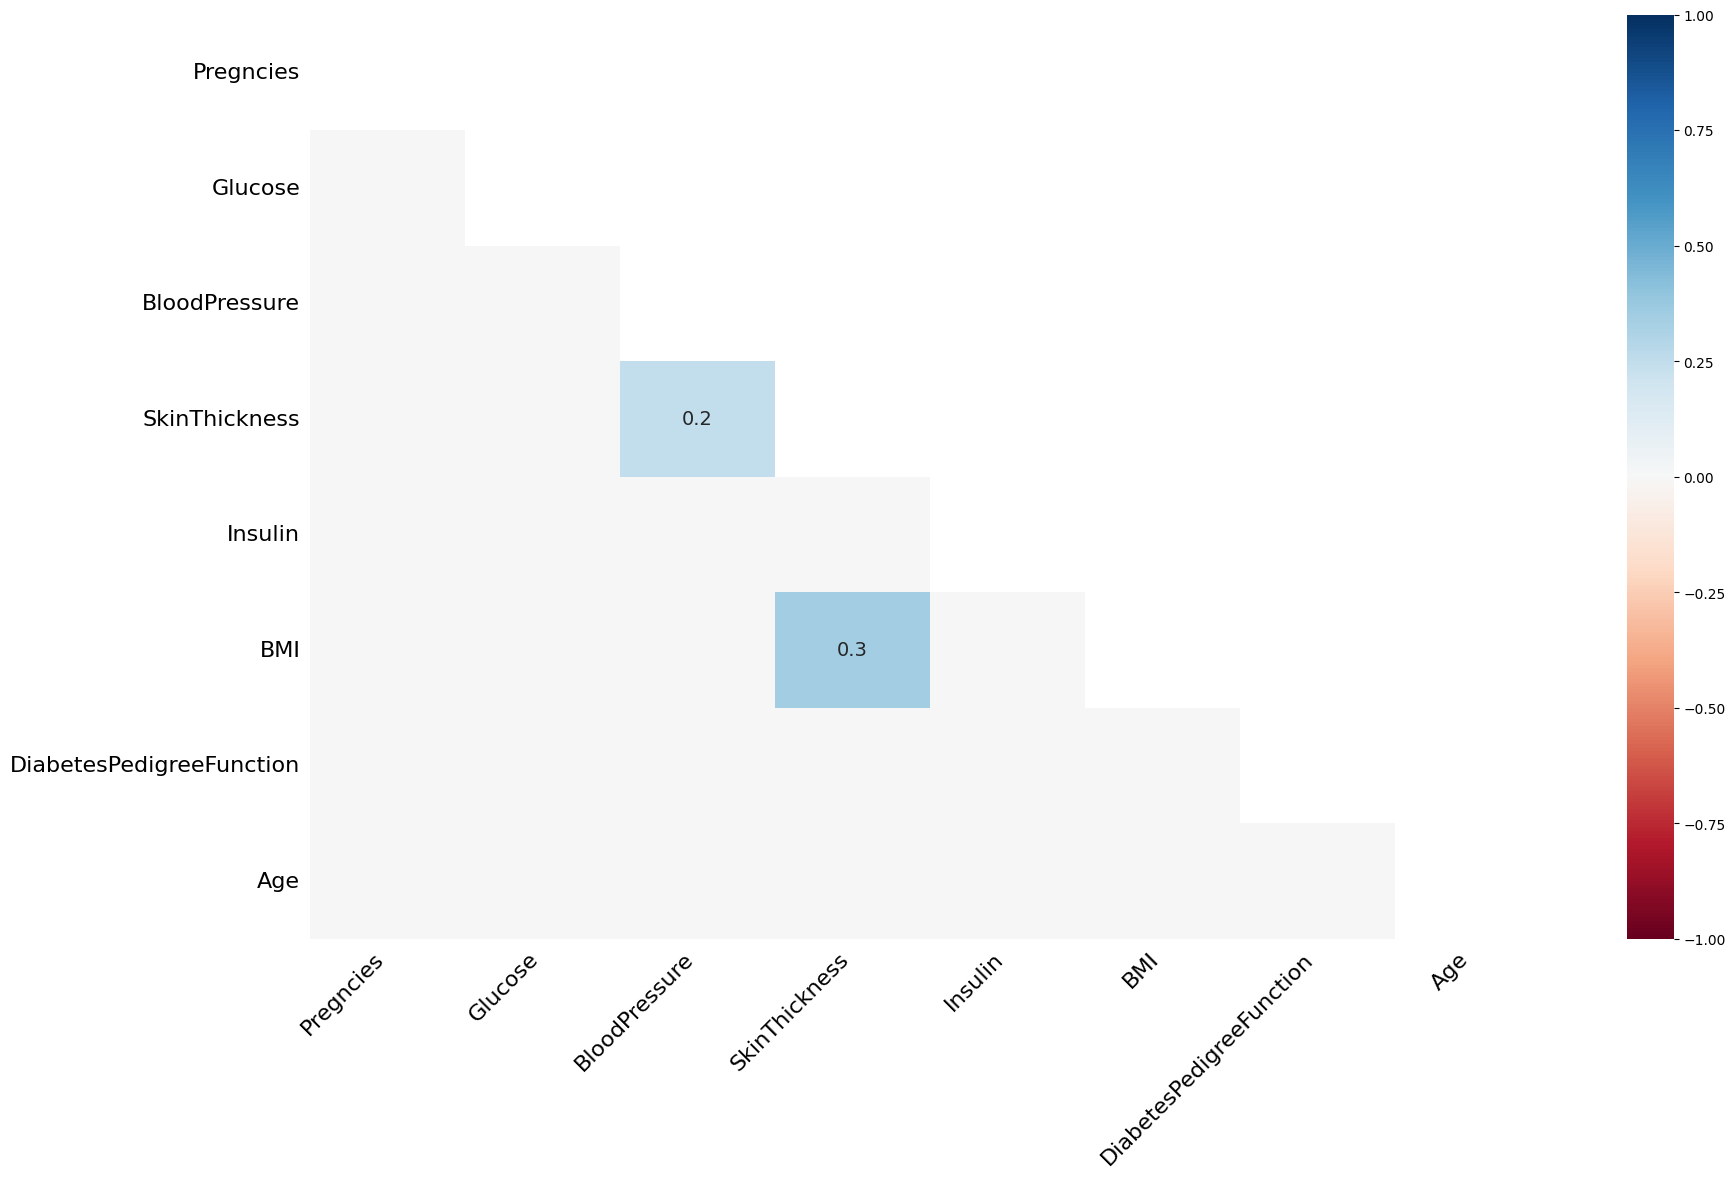

In [27]:
msno.heatmap(df)

**Dendrogram**

-   The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity.

-   If a number of columns are grouped together at level zero, then the presence of nulls in one of those columns is directly related to the presence or absence of nulls in the others columns. The more separated the columns in the tree, the less likely the null values can be correlated between the columns.


<Axes: >

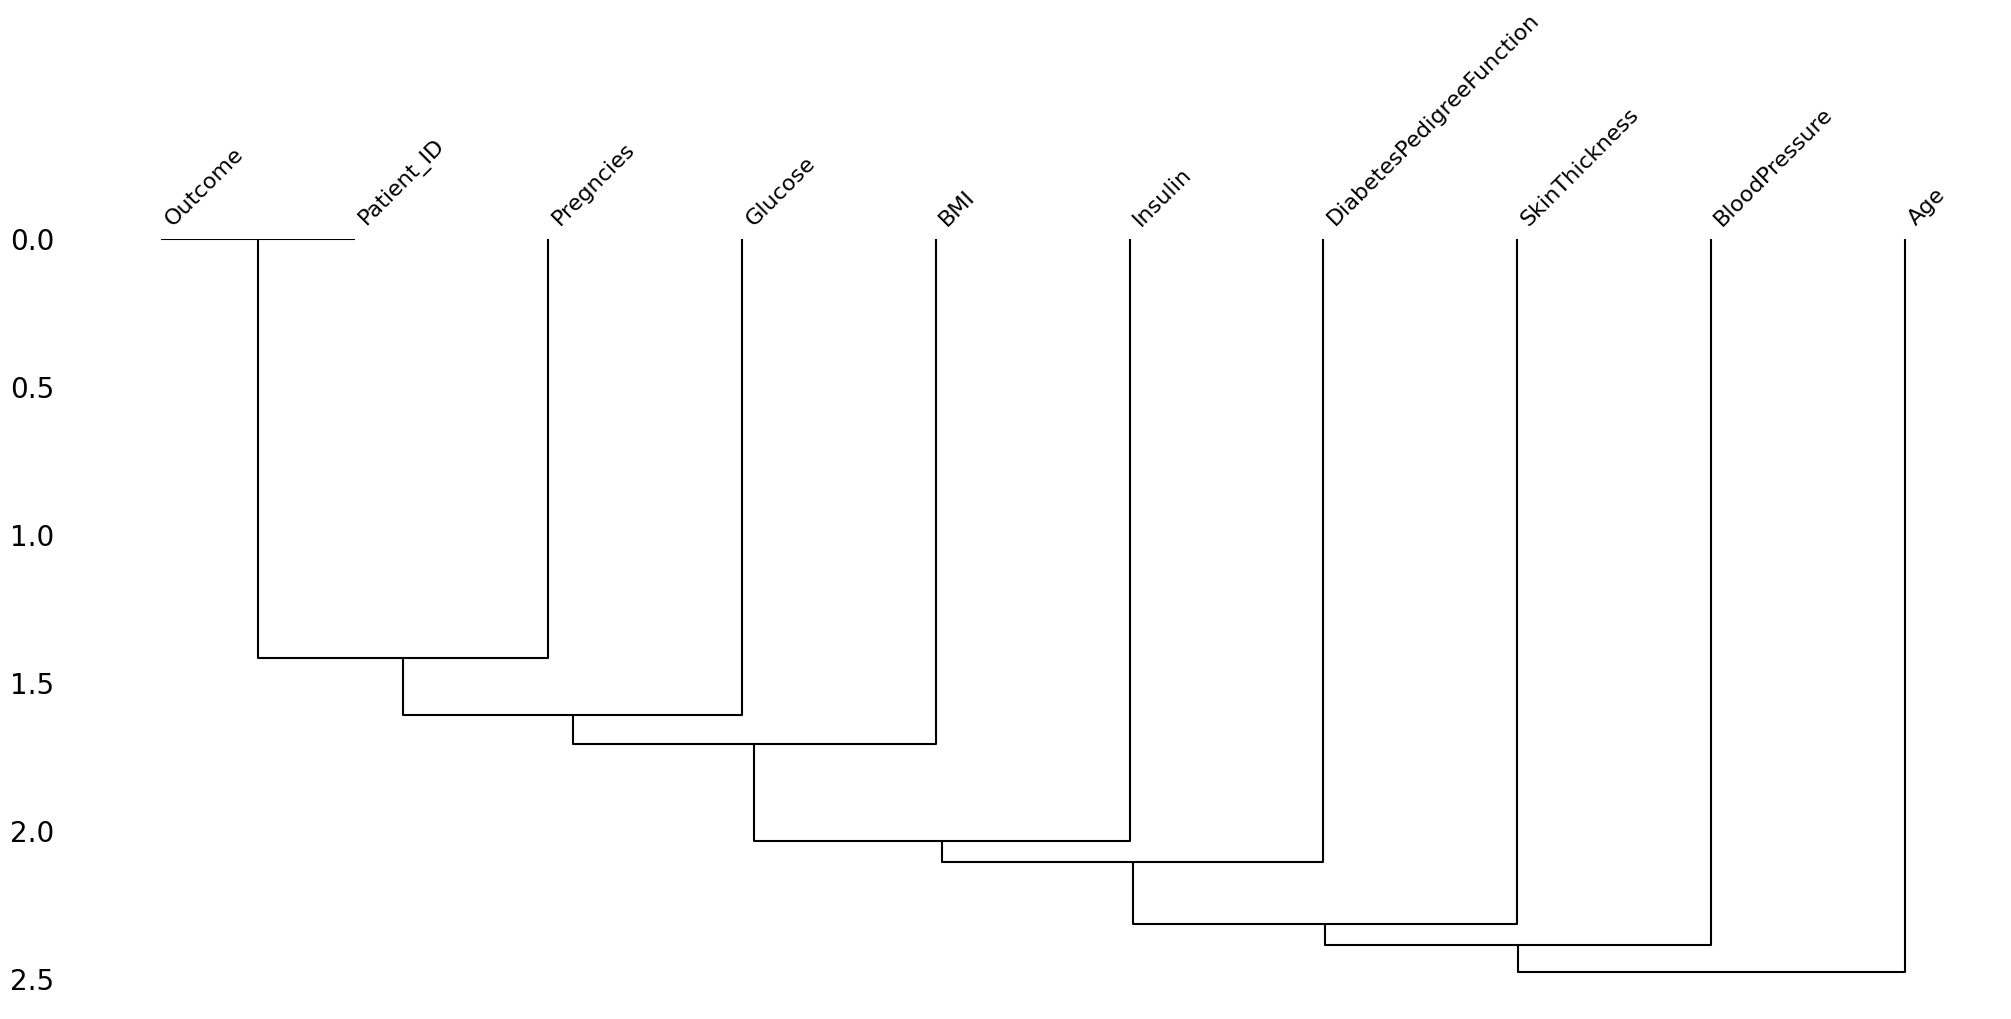

In [28]:
msno.dendrogram(df)

### Fill the missing values / Drop the missing values

In [29]:
# fill the nan values with mean

df.fillna(df.mean(), inplace=True)

In [30]:
df.isna().sum()

Patient_ID                  0
Pregncies                   0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Handling the Outliers


### Using z-score


In [31]:
def remove_outliers_z_score(df, column, remove=True):
    threshold = 3
    mean = np.mean(df[column])
    std = np.std(df[column])
    z_score = [(y - mean) / std for y in df[column]]
    if remove:
        df["z_score"] = z_score
        df = df[(df["z_score"] < threshold) & (df["z_score"] > -threshold)]
    # count the number of outliers
    outliers = [val for val in z_score if val > threshold or val < -threshold]
    return df, len(outliers)

### Using IQR


In [32]:
def remove_outliers_iqr(df, column, remove=True):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    if remove:
        df = df[(df[column] < q3 + 1.5 * iqr) & (df[column] > q1 - 1.5 * iqr)]

    # count the number of outliers
    outliers = [
        val for val in df[column] if val > q3 + 1.5 * iqr or val < q1 - 1.5 * iqr
    ]
    return df, len(outliers)

### Using 99% percentile method


In [33]:
def remove_outliers_99_percentile(df, column, remove=True):
    q = df[column].quantile(0.99)

    if remove:
        df = df[df[column] < q]

    # count the number of outliers
    outliers = [val for val in df[column] if val >= q]
    return df, len(outliers)

## Analysing the target class (Outcome)


In [34]:
fig2 = px.pie(
    df,
    names="Outcome",
    height=400,
    width=600,
    hole=0.7,
    title="Outcome class Overview",
    color_discrete_sequence=["#4c78a8", "#72b7b2"],
)
fig2.update_traces(
    hovertemplate=None, textposition="outside", textinfo="percent+label", rotation=0
)
fig2.update_layout(
    margin=dict(t=100, b=30, l=0, r=0),
    showlegend=False,
    plot_bgcolor="#fafafa",
    paper_bgcolor="#fafafa",
    title_font=dict(size=20, color="#555", family="Lato, sans-serif"),
    font=dict(size=17, color="#8a8d93"),
    hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"),
)
fig2.show()

## Check the distrubutions of the data


In [35]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
num_cols.remove("Patient_ID")
num_cols.remove("Outcome")

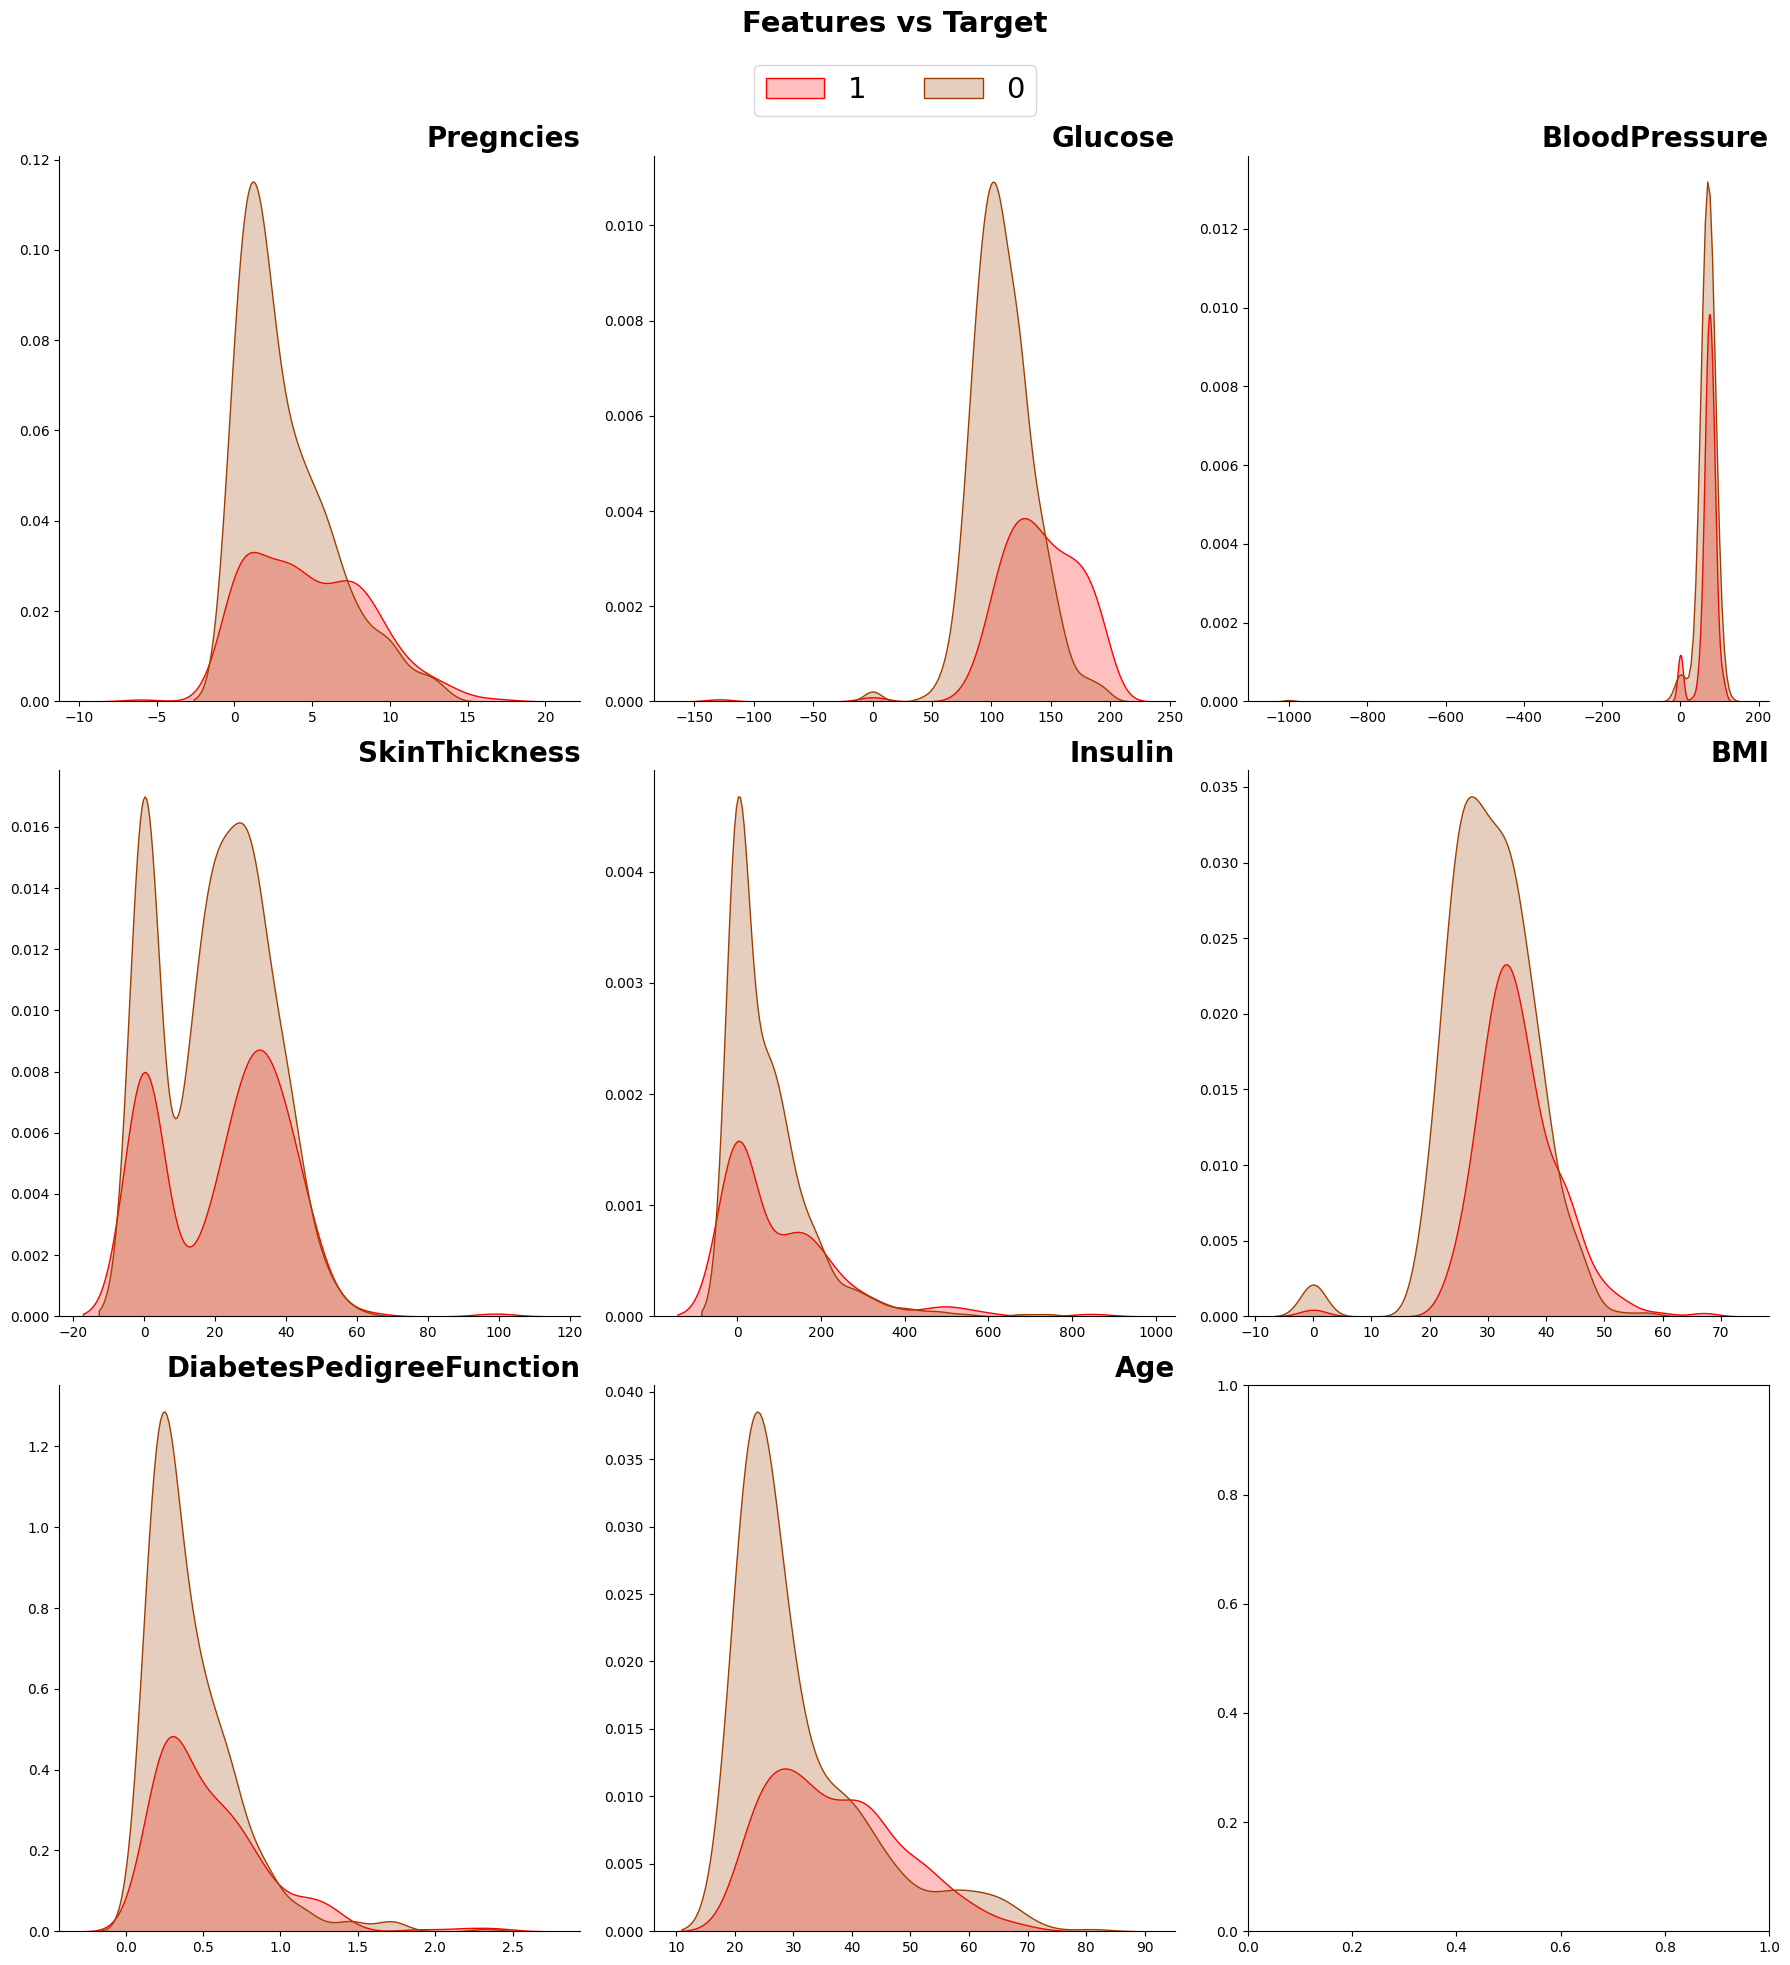

CPU times: total: 1.67 s
Wall time: 1.71 s


In [36]:
%%time
l = len(num_cols)
num_cols_max = 3  # Set the maximum number of columns per row
num_rows = (l + num_cols_max - 1) // num_cols_max  # Calculate the number of rows based on the number of columns

figsize = (6*num_cols_max, 20)  # Adjust figsize based on the number of rows
fig, axes = plt.subplots(num_rows, num_cols_max, figsize=figsize)
axes = axes.flatten()  # Flatten the axes array for easier indexing

for idx, col in enumerate(num_cols):
    if idx >= l:
        break  # Break the loop if we have reached the end of num_cols

    ax = axes[idx]
    sns.kdeplot(
        data=df, hue='Outcome', fill=True,
        x=col, palette=['#9E3F00', 'red'], legend=False, ax=ax
    )
            
    ax.set_ylabel('')
    ax.spines['top'].set_visible(False)
    ax.set_xlabel('')
    ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='right', weight='bold', fontsize=20)

fig.suptitle(f'Features vs Target\n\n\n', ha='center', fontweight='bold', fontsize=21)
fig.legend([1, 0], loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=21, ncol=3)

plt.tight_layout()
plt.show()

### Fix the skewness of the data


In [37]:
df.skew().sort_values(ascending=False)

Insulin                      2.422491
DiabetesPedigreeFunction     1.927255
Age                          1.128227
Pregncies                    0.870859
Outcome                      0.633199
SkinThickness                0.111213
Patient_ID                   0.000000
Glucose                     -0.371332
BMI                         -0.428320
BloodPressure              -19.967205
dtype: float64

#### Using log transformation


In [38]:
def fix_skewness_using_log_transformation(df, column):
    df[column] = np.log(df[column])
    return df

#### Using cube root transformation


In [39]:
def fix_skewness_using_cube_root_transformation(df, column):
    df[column] = np.cbrt(df[column])
    return df

#### Using square root transformation


In [40]:
def fix_skewness_using_square_root_transformation(df, column):
    df[column] = np.sqrt(df[column])
    return df

#### Using square transformation for left skewed data


In [41]:
def fix_left_skewness_using_square_transformation(df, column):
    df[column] = np.power(df[column], 2)
    return df

#### Using reciprocal transformation


In [42]:
def fix_skewness_using_reciprocal_transformation(df, column):
    df[column] = 1 / df[column]
    return df

#### Using box cox transformation


In [43]:
from scipy import stats


def fix_skewness_using_box_cox_transformation_positive_data(df, column):
    df[column] = stats.boxcox(df[column])[0]
    return df

## Correlation between the features


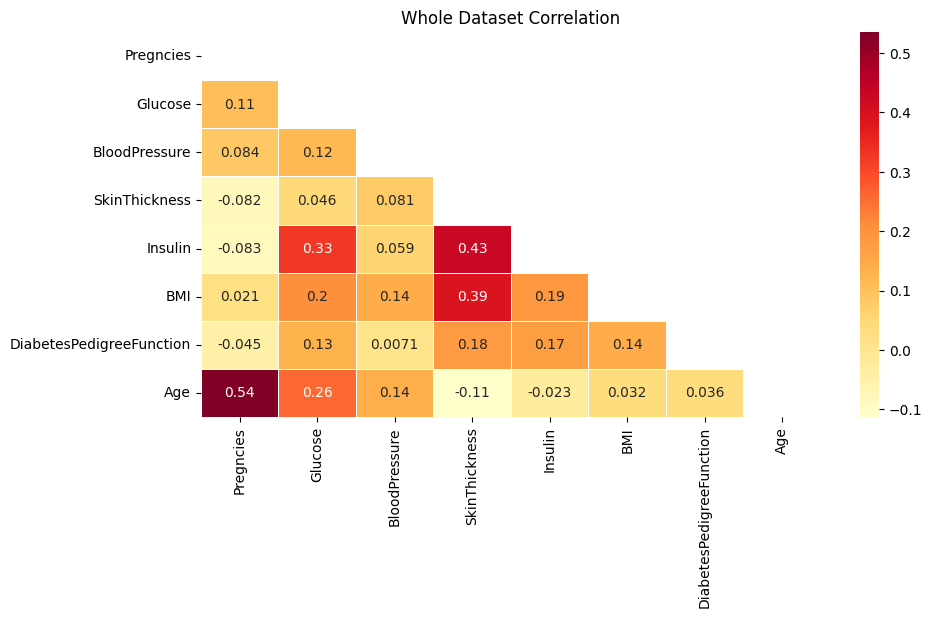

In [44]:
def plot_correlation_heatmap(
    df: pd.core.frame.DataFrame, title_name: str = "Train correlation"
) -> None:
    corr = df.corr()
    fig, axes = plt.subplots(figsize=(10, 5))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, linewidths=0.5, cmap="YlOrRd", annot=True)
    plt.title(title_name)
    plt.show()


# plot_correlation_heatmap(train[num_cols], 'Train Dataset Correlation')
# plot_correlation_heatmap(test[num_cols], 'Test Dataset Correlation')

plot_correlation_heatmap(df[num_cols], "Whole Dataset Correlation")

## Covariace between the features


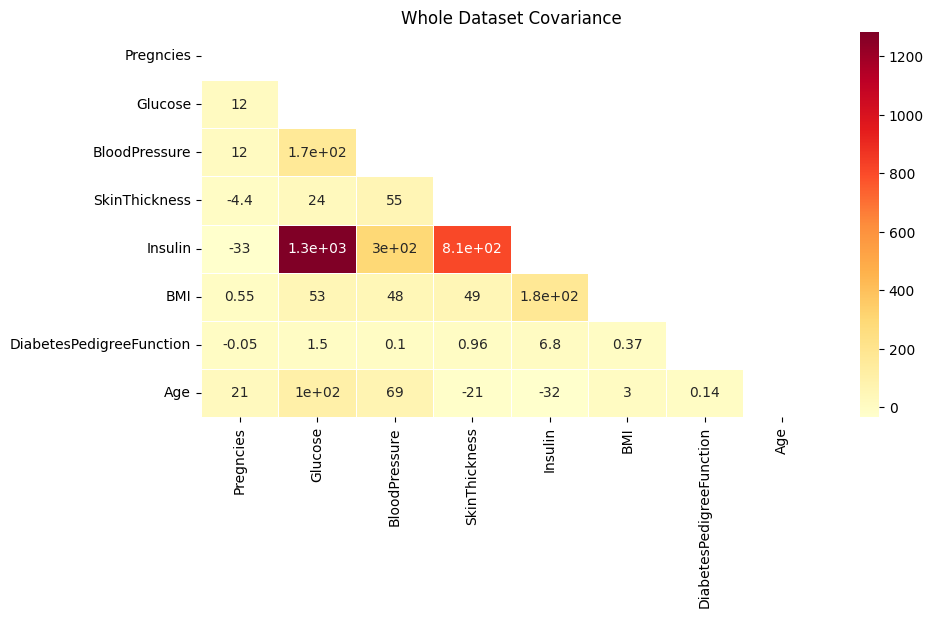

In [45]:
def plot_covariance_heatmap(
    df: pd.core.frame.DataFrame, title_name: str = "Covariance"
) -> None:
    cov = df.cov()
    fig, axes = plt.subplots(figsize=(10, 5))
    mask = np.zeros_like(cov)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(cov, mask=mask, linewidths=0.5, cmap="YlOrRd", annot=True)
    plt.title(title_name)
    plt.show()


# plot_covelation_heatmap(train[num_cols], 'Train Dataset Correlation')
# plot_correlation_heatmap(test[num_cols], 'Test Dataset Correlation')

plot_covariance_heatmap(df[num_cols], "Whole Dataset Covariance")

# Feature Engineering


# Scaling the data


In [46]:
def scale_data(df, scaler, columns_to_scale):
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    return df

In [47]:
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    PowerTransformer,
    QuantileTransformer,
)

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
power_transformer = PowerTransformer()
quantile_transformer = QuantileTransformer()

## Power Transformer

Apply a power transform featurewise to make data more Gaussian-like.

In [48]:
power_transformed_df = scale_data(df.copy(), power_transformer, num_cols)

## Standard Scaler

In [49]:
standard_scaled_df = scale_data(df.copy(), standard_scaler, num_cols)

## Min max Scaler

In [50]:
min_max_scaled_df = scale_data(df.copy(), min_max_scaler, num_cols)

## Robust Scaler

In [51]:
robust_scaled_df = scale_data(df.copy(), robust_scaler, num_cols)

## Quantile Transformer

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

In [52]:
quantile_transformed_df = scale_data(df.copy(), quantile_transformer, num_cols)

# Write to a CSV file

In [53]:
power_transformed_df.to_csv("preprocessed_data.csv", index=False)